In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('C:/Users/amous/Downloads/s.csv')
data = X.drop('contract_id', axis=1)  # Features (phone number attributes)


In [2]:
X['full_secteur'].describe()

count             41742
unique            10870
top       LBI-1044_U-93
freq                 73
Name: full_secteur, dtype: object

In [3]:
for i in data.columns:
    print(i)

dn
profile_id
subprofile
produit
full_vol
full_secteur
full_city


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load the Data
# data = pd.read_csv('C:/Users/amous/Downloads/voice_bts.csv')

print("step 1 load done ")


# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

print("step2 categorical col done ")
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

print("next step after encoding cate col")
# Handle missing values, if any
# data = data.replace('* Value not available', np.nan)

# Step 4: Apply Hierarchical Clustering
# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if col != 'dn']
X = data[columns_for_clustering].values

# Compute the linkage matrix
linkage_matrix = linkage(X, method='ward')
print("linkage matrix")
# Perform clustering
n_clusters = 3  # Number of clusters
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hierarchical.fit(X)
print("application of hierarchical algo")
# Step 5: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
print()
# Step 6: Get Cluster Labels
labels = hierarchical.labels_


step 1 load done 
step2 categorical col done 
next step after encoding cate col


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_csv('C:/Users/amous/Downloads/voice_bts.csv')

# Step 2: Data Preprocessing
# Handle any necessary data preprocessing steps here, such as handling missing values

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

# Handle missing values, if any
# data = data.replace('* Value not available', np.nan)

# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if (col != 'dn' || col!='contract_id')]
X = data[columns_for_clustering].values

# Perform Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_reduced = pca.fit_transform(X)

# Compute the linkage matrix
linkage_matrix = linkage(X_reduced, method='ward')

# Step 4: Perform Clustering
n_clusters = 3  # Number of clusters
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = hierarchical.fit_predict(X_reduced)

# Step 5: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_csv('C:/Users/amous/Downloads/voice_bts.csv')

# Step 2: Data Preprocessing
# Handle any necessary data preprocessing steps here, such as handling missing values

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [3]:
# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if (col != 'dn' or col!='contract_id')]
X = data[columns_for_clustering].values

# Perform Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_reduced = pca.fit_transform(X)

In [4]:
# Compute the linkage matrix
linkage_matrix = linkage(X_reduced, method='ward')

C:\Users\amous\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


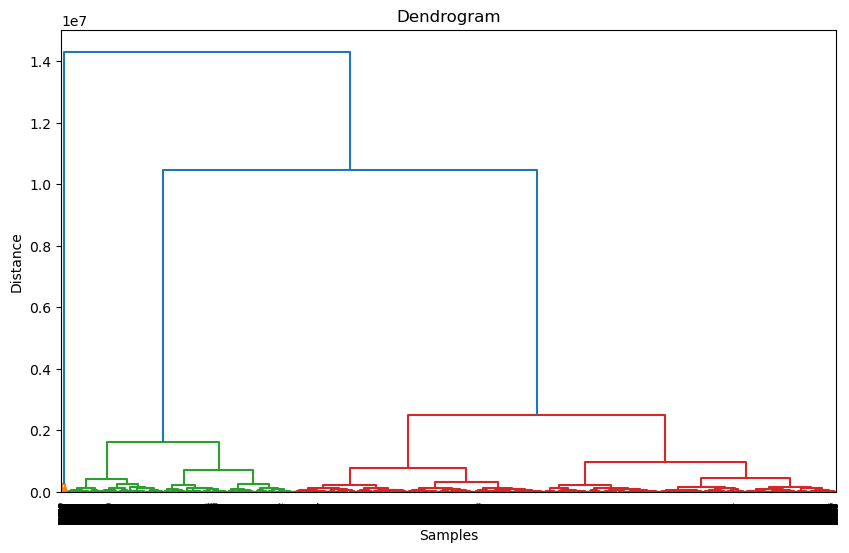

In [5]:
# Step 4: Perform Clustering
n_clusters = 3  # Number of clusters
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = hierarchical.fit_predict(X_reduced)

# Step 5: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8258235110430223


C:\Users\amous\AppData\Local\Temp\ipykernel_5672\2995320250.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)


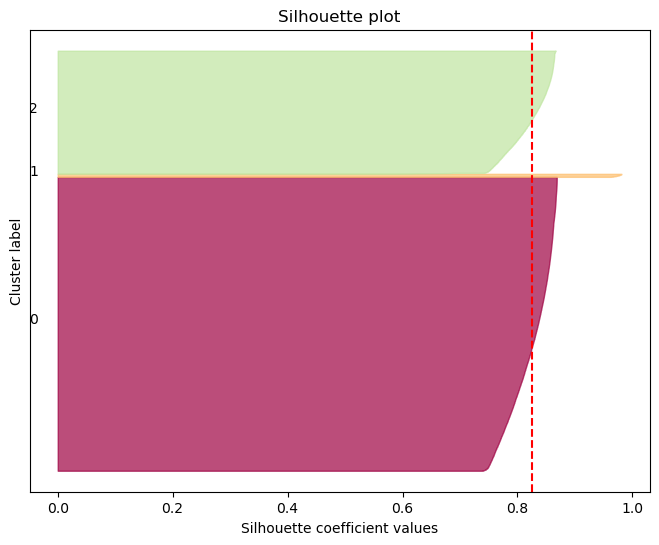

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
silhouette_values = silhouette_samples(X_reduced, labels)

# Create a scatter plot of the silhouette scores
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in the current cluster
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    # Calculate the size of the current cluster
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    # Plot the silhouette scores for samples in the current cluster
    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    
    # Update the lower bound for the next cluster plot
    y_lower = y_upper + 10

# Set plot aesthetics
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.title("Silhouette plot")
plt.show()
